<a href="https://colab.research.google.com/github/Lekhureddy/Enterprise-Resource-Performance-Analytics-System/blob/main/enterprise_resource_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enterprise-Resource-Performance-Analytics-System

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [81]:

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/projects.csv")

# 1. Basic structure
print("Dataset Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())

# 2. Data types
print("\nData Types:\n")
print(df.dtypes)

# 3. Missing values
missing_df = (df.isnull().sum().to_frame(name="Missing_Count"))
missing_df["Missing_Percent"] = (missing_df["Missing_Count"] / len(df)) * 100

print("\nMissing Values Summary:\n")
display(missing_df.sort_values("Missing_Percent", ascending=False))

# 4. Duplicate rows
print("\nDuplicate Rows:", df.duplicated().sum())

# 5. Basic statistics
display(df.describe())

# 6. Sample rows
display(df.head())

Dataset Shape: (420, 16)

Columns:
 ['Project_ID', 'Project_Type', 'Team_Size', 'Team_Experience', 'Estimated_Hours', 'Actual_Hours', 'Schedule_Variance', 'Budget_Allocated', 'Budget_Usage_Percent', 'Resource_Cost', 'Utilization_Percent', 'Tasks_Completed_Percent', 'Issues_Reported', 'Attrition', 'Risk_Level', 'Outcome']

Data Types:

Project_ID                  object
Project_Type                object
Team_Size                    int64
Team_Experience             object
Estimated_Hours              int64
Actual_Hours                 int64
Schedule_Variance            int64
Budget_Allocated             int64
Budget_Usage_Percent       float64
Resource_Cost              float64
Utilization_Percent        float64
Tasks_Completed_Percent    float64
Issues_Reported            float64
Attrition                    int64
Risk_Level                  object
Outcome                     object
dtype: object

Missing Values Summary:



,Missing_Count,Missing_Percent
Budget_Usage_Percent,41,9.761905
Resource_Cost,37,8.809524
Utilization_Percent,35,8.333333
Issues_Reported,33,7.857143
Tasks_Completed_Percent,29,6.904762
Team_Experience,21,5.000000
Project_Type,0,0.000000
Project_ID,0,0.000000
Budget_Allocated,0,0.000000
Schedule_Variance,0,0.000000



Duplicate Rows: 0


,Team_Size,Estimated_Hours,Actual_Hours,Schedule_Variance,Budget_Allocated,Budget_Usage_Percent,Resource_Cost,Utilization_Percent,Tasks_Completed_Percent,Issues_Reported,Attrition
count,420.000000,420.000000,420.000000,420.000000,420.000000,379.000000,383.000000,385.000000,391.000000,387.000000,420.000000
mean,11.776190,1024.252381,1203.126190,178.873810,137484.523810,104.304749,62168.929504,73.657143,72.376215,7.354005,0.114286
std,4.859104,270.098229,382.788913,161.074393,55876.629135,15.502271,28060.501728,10.995047,13.839780,3.936840,0.318537
min,3.000000,194.000000,257.000000,-221.000000,25000.000000,64.800000,8000.000000,45.000000,28.200000,0.000000,0.000000
25%,8.000000,846.250000,954.750000,63.000000,97575.000000,93.100000,41415.000000,66.100000,63.000000,4.000000,0.000000
50%,12.000000,1020.000000,1191.500000,162.000000,126750.000000,104.100000,59540.000000,74.700000,73.100000,7.000000,0.000000
75%,15.000000,1203.250000,1461.500000,275.250000,174425.000000,114.350000,81075.000000,81.300000,82.050000,10.000000,0.000000
max,25.000000,1835.000000,2533.000000,698.000000,375500.000000,145.000000,164870.000000,96.000000,100.000000,21.000000,1.000000


,Project_ID,Project_Type,Team_Size,Team_Experience,Estimated_Hours,Actual_Hours,Schedule_Variance,Budget_Allocated,Budget_Usage_Percent,Resource_Cost,Utilization_Percent,Tasks_Completed_Percent,Issues_Reported,Attrition,Risk_Level,Outcome
0,PRJ-0001,Automation,15,Medium,1049,1088,39,133100,100.9,68820.0,54.2,83.6,2.0,0,Low,On-time
1,PRJ-0002,Infrastructure,11,High,1321,1370,49,202000,95.8,76390.0,68.2,75.0,3.0,0,Low,Delayed
2,PRJ-0003,Automation,11,Medium,988,999,11,153000,71.2,64670.0,77.5,65.9,NaN,1,Medium,Delayed
3,PRJ-0004,R&D,16,Medium,1290,1616,326,174500,133.7,85170.0,80.3,45.8,11.0,0,High,Delayed
4,PRJ-0005,Product,3,Medium,907,1111,204,117900,88.8,38470.0,57.1,68.4,7.0,0,Medium,Delayed


EDA AND KPI

,Percent
Outcome,
Delayed,67.4
On-time,32.6


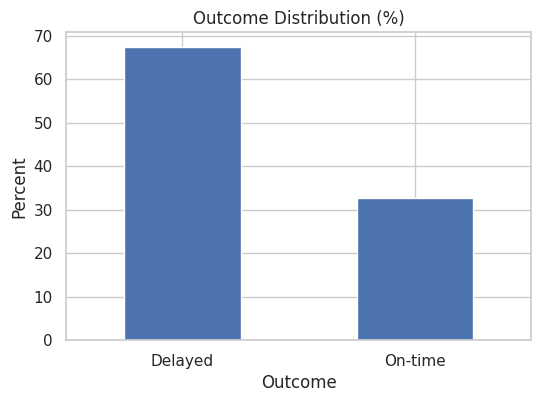

In [82]:
sns.set(style="whitegrid")

# KPI 1: Outcome rate
outcome_pct = (df["Outcome"].value_counts(normalize=True) * 100).round(1)
display(outcome_pct.to_frame("Percent"))

plt.figure(figsize=(6,4))
outcome_pct.plot(kind="bar")
plt.title("Outcome Distribution (%)")
plt.ylabel("Percent")
plt.xticks(rotation=0)
plt.show()


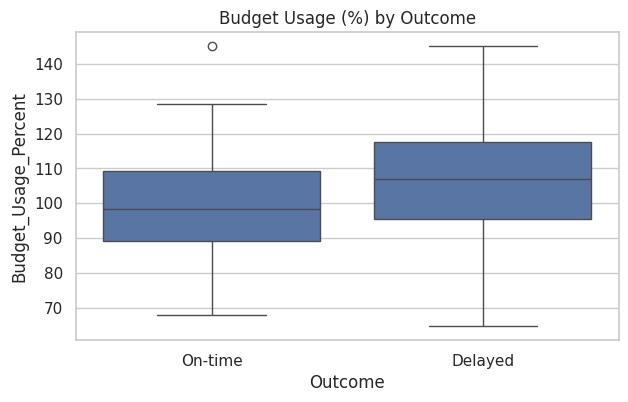

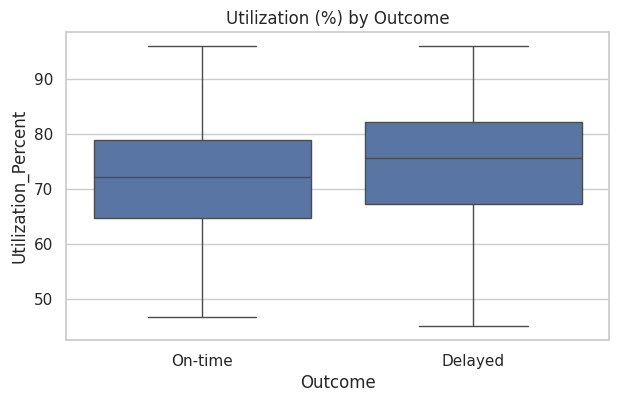

In [83]:
# KPI 2: Budget Usage vs Outcome
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Outcome", y="Budget_Usage_Percent")
plt.title("Budget Usage (%) by Outcome")
plt.show()

# KPI 3: Utilization vs Outcome
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Outcome", y="Utilization_Percent")
plt.title("Utilization (%) by Outcome")
plt.show()


Issues, Attrition & Risk Impact

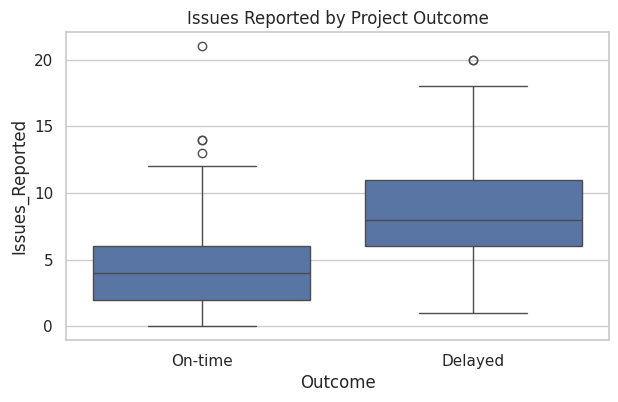

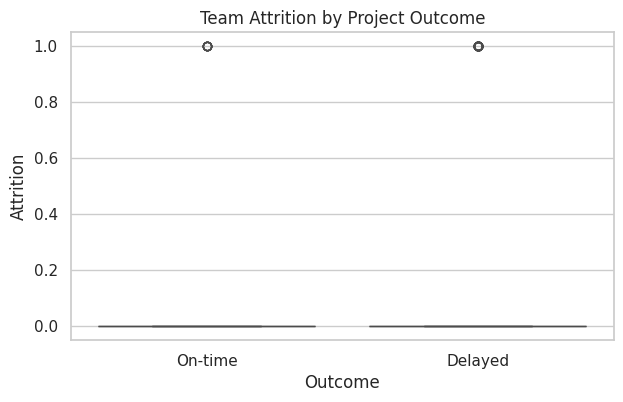

In [84]:
# Issues reported vs Outcome
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Outcome", y="Issues_Reported")
plt.title("Issues Reported by Project Outcome")
plt.show()

# Attrition vs Outcome
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Outcome", y="Attrition")
plt.title("Team Attrition by Project Outcome")
plt.show()


Data cleaning and Preparation

In [85]:
# Create a working copy
df_clean = df.copy()

numeric_cols = [
    "Budget_Usage_Percent",
    "Resource_Cost",
    "Utilization_Percent",
    "Issues_Reported",
    "Tasks_Completed_Percent",
    "Team_Experience"
]

# Force numeric conversion
for col in numeric_cols:
    df_clean[col] = pd.to_numeric(df_clean[col], errors="coerce")

# Check missing values again
display(df_clean.isna().sum())


,0
Project_ID,0
Project_Type,0
Team_Size,0
Team_Experience,420
Estimated_Hours,0
Actual_Hours,0
Schedule_Variance,0
Budget_Allocated,0
Budget_Usage_Percent,41
Resource_Cost,37


Machine Learning - Predicting Project Delay

In [86]:

# Target
target = "Outcome"

# Features
X = df_clean.drop(columns=[target])
if "Project_ID" in X.columns:
    X = X.drop(columns=["Project_ID"])
y = df_clean[target]

# ✅ Force correct column split (no risk of mixing)
numeric_features = X.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = X.select_dtypes(include=["object", "category"]).columns.tolist()

print("Numeric:", numeric_features)
print("Categorical:", categorical_features)

# Preprocessing
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

# Model pipeline
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", LogisticRegression(max_iter=5000, solver="lbfgs"))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Train + predict
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Numeric: ['Team_Size', 'Team_Experience', 'Estimated_Hours', 'Actual_Hours', 'Schedule_Variance', 'Budget_Allocated', 'Budget_Usage_Percent', 'Resource_Cost', 'Utilization_Percent', 'Tasks_Completed_Percent', 'Issues_Reported', 'Attrition']
Categorical: ['Project_Type', 'Risk_Level']

Classification Report:
               precision    recall  f1-score   support

     Delayed       0.81      0.88      0.84        57
     On-time       0.68      0.56      0.61        27

    accuracy                           0.77        84
   macro avg       0.74      0.72      0.73        84
weighted avg       0.77      0.77      0.77        84


Confusion Matrix:
 [[50  7]
 [12 15]]


/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Team_Experience']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/impute/_base.py:635: UserWarning: Skipping features without any observed values: ['Team_Experience']. At least one non-missing value is needed for imputation with strategy='median'.
  warnings.warn(


In [87]:
# Save clean dataset for Power BI
df_clean.to_csv("projects_clean.csv", index=False)

# Save train-ready dataset (features + target)
df_model = df_clean.copy()
df_model.to_csv("projects_model_ready.csv", index=False)

print("Saved: projects_clean.csv and projects_model_ready.csv")


Saved: projects_clean.csv and projects_model_ready.csv
